# Exploratoy Data Analysis of Diabetes Data

I took a dataset from Kaggle based around whether a person was diabetic or not based off multiple traits. I then carried out an exploratory data analysis to see which variables were related, and which would be suitable for a model to predict whether a person was diabetic. 

Import packages:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
import matplotlib.pyplot as plt

Mount google drive:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read csv into a dataframe:

In [60]:
df = pd.read_csv("drive/My Drive/csv's/DiabetesProject/diabetes_data.csv",engine='python')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


520 rows, 17 columns

In [61]:
print(df.shape)

(520, 17)


In [62]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

The below separates the numerical and categorical variables in the dataset. Therefore I am able to display the counts of the categorical variable at the same time using a nested for loop. 

In [63]:
numerical = ['Age']

In [64]:
categorical = ['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity','class']

In [65]:
df = df[numerical + categorical]
df.shape

(520, 17)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

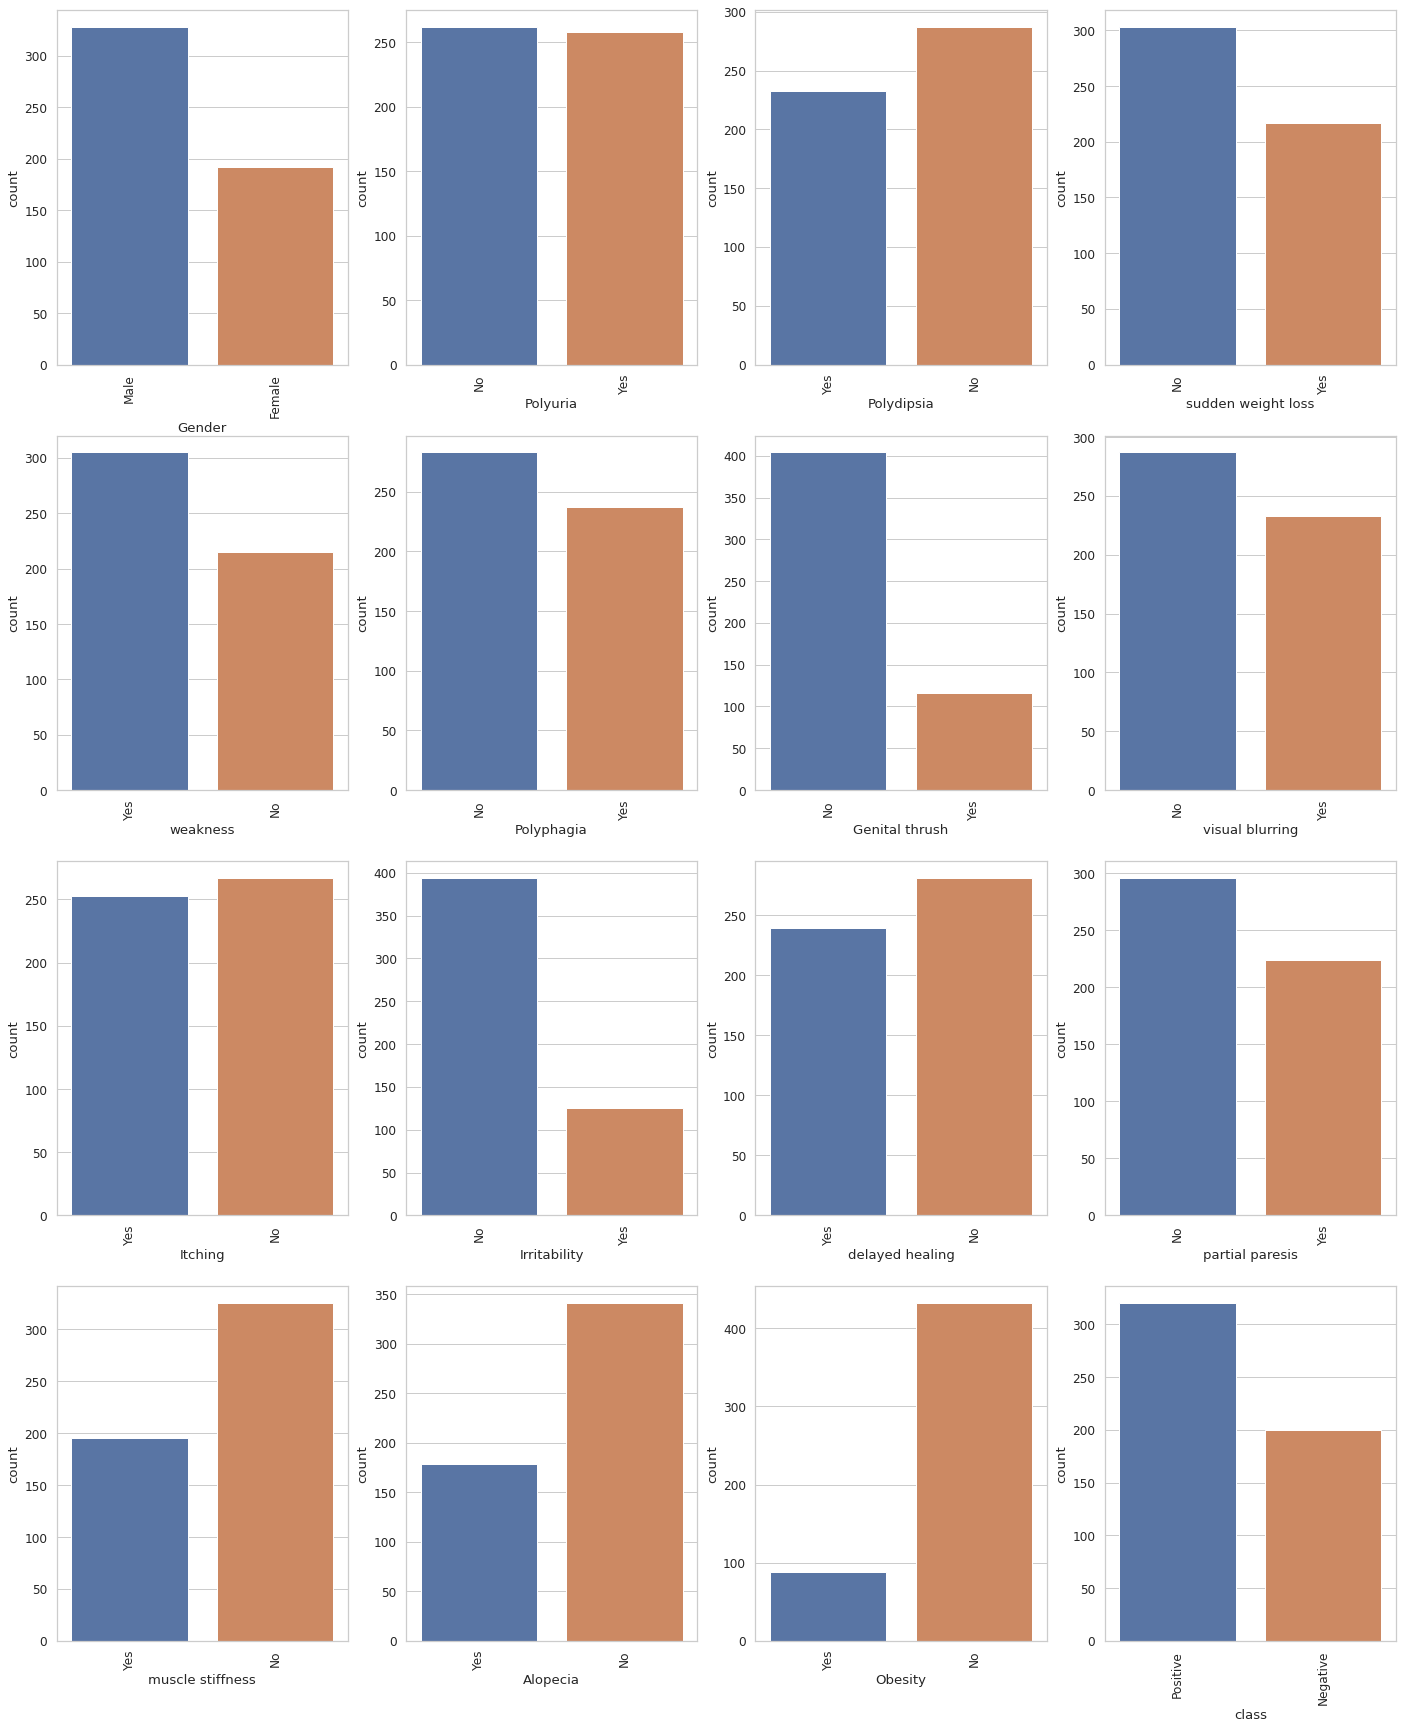

In [66]:
fig, ax = plt.subplots(4, 4, figsize=(24, 30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Impute everything with 1's and 0's to make it easier to work with:

*   1 is yes, 0 is no
*   1 is male, 0 is female
*   1 is positive, 0 is negative






In [51]:
df.replace(('Yes', 'No'), (1, 0), inplace=True)
df.replace(('Male', 'Female'), (1, 0), inplace=True)
df.replace(('Positive', 'Negative'), (1, 0), inplace=True)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


This compares all variables, and can examine multicolinearity and which variables are related to the dependent variable, class. 

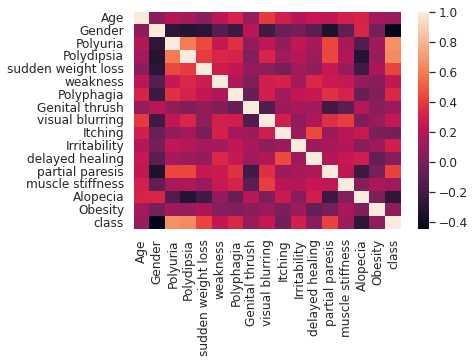

In [58]:
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



*   Firstly, can see that gender is related to the most variables. This is not good as it presents a large amount of multicolinearity.
*   Looking at class (the variable we are tyring to predict), we can see that Gender, Polyuria, Polydipsia and Alopecia are all related to the class. 
*   Based off this heatmap if I were to build a model to predict whether a person was diabetic or not I would probably use all four of those variables. I would use Gender as this is related to a lot of the variables that will not be included in the model. Even if it is related to the other variables in the model, it would likely yield better accuracy as gender is a big help when it comes to seeing whether a person is diabetic for this dataset.




 